# Machine Learning Project
#### Dataset:
the **Titanic** dataset, this is a dataset used for classification to predict if the titanic passenger survived or not.<br>

In [120]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Step 0. Data exploration

In [121]:
# load the dataset
dataset = pd.read_csv('titanic.csv')
dataset.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [122]:
dataset.shape

(1309, 11)

Seeing how many numerical columns we have

In [123]:
dataset.select_dtypes(exclude='number').columns

Index(['name', 'sex', 'ticket', 'cabin', 'embarked'], dtype='object')

Seeing how many categorical columns we have 

In [124]:
dataset.select_dtypes(include='number').columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'survived'], dtype='object')

we find that the `pclass` feature is actually a discrete feature taking a value of *[1,2,3]* and the target column `survived` is the class of wether a passenger survived or not *[0,1]*

<center>___________________________________________________________________________________________</center>

In [125]:
dataset.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


#### Features of the dataset:
`pclass` - Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd <br>
`sex` - Sex <br>
`Age` - Age in years <br>
`sibsp` - # of siblings / spouses aboard the Titanic <br>
`parch` - # of parents / children aboard the Titanic <br>
`ticket` - Ticket number <br>
`fare` - Passenger fare <br>
`cabin` - Cabin number <br>
`embarked` - Port of Embarkation:
- C = Cherbourg,
- Q = Queenstown,
- S = Southampton
#### Target
 `survived` - is the class of wether a passenger survived or not: 0 = no, 1= yes <br>
 <hr>

## Step 1. Data Cleaning and preprocessing

### Cleaning the Training dataset

Checking for duplicated records

In [126]:
dataset.duplicated().sum()

0

it seems to be no duplicated records in the dataset which is good

Calculating the percentage of null of values in each column 

In [127]:
dataset.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

As the `name` will ot be useful in our model or analysis, we will remove it from the dataset

In [128]:
train_data = dataset.drop('name', axis=1, inplace= False)
train_data.head()

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,female,25.0000,1,2,113781,151.5500,C22 C26,S,0


As the `ticket` (ticket number) will not be useful in our model or analysis, we will remove it from the dataset

In [129]:
train_data.drop('ticket', axis=1, inplace=True)
train_data.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,survived
0,1,female,29.0000,0,0,211.3375,B5,S,1
1,1,male,0.9167,1,2,151.5500,C22 C26,S,1
2,1,female,2.0000,1,2,151.5500,C22 C26,S,0
3,1,male,30.0000,1,2,151.5500,C22 C26,S,0
4,1,female,25.0000,1,2,151.5500,C22 C26,S,0


It seems that `cabin` column has 1014 out of 1309 missing so we will drop that column

In [130]:
train_data.drop('cabin', axis=1, inplace=True)
train_data.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,1,female,2.0000,1,2,151.5500,S,0
3,1,male,30.0000,1,2,151.5500,S,0
4,1,female,25.0000,1,2,151.5500,S,0


In [131]:
# take a look at the categorical values of each categorical column
for column in train_data.select_dtypes(exclude='number').columns:
    print(column," : ", train_data[column].unique())

sex  :  ['female' 'male']
embarked  :  ['S' 'C' nan 'Q']


In [132]:
# take a look at the categorical values of each categorical column
for column in ['sibsp', 'parch']:
    print(column," : ", train_data[column].unique())

sibsp  :  [0 1 2 3 4 5 8]
parch  :  [0 2 1 4 3 5 6 9]


#### Cleaning the numerical features: Checking for outliers
Checking the ranges of each numerical value to find and remove any abnormalities.

In [133]:
# getting the range of each column 
for column in train_data.select_dtypes(include='number').columns:
    print(f"range of {column} is from {train_data[column].min()} to {train_data[column].max()}")

range of pclass is from 1 to 3
range of age is from 0.1667 to 80.0
range of sibsp is from 0 to 8
range of parch is from 0 to 9
range of fare is from 0.0 to 512.3292
range of survived is from 0 to 1


We notice that the age range has some very small float values which are not correct at all. <br>
We set a threshold which is 3, and anything below 3 will be replaced by the mean.

In [134]:
train_data['age'] = train_data['age'].apply(lambda x: train_data['age'].mean() if x < 3 else x)

In [135]:
# cast the age column to int 
train_data['age'] = train_data['age'].round().astype('Int64')

In [136]:
train_data.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29,0,0,211.3375,S,1
1,1,male,30,1,2,151.5500,S,1
2,1,female,30,1,2,151.5500,S,0
3,1,male,30,1,2,151.5500,S,0
4,1,female,25,1,2,151.5500,S,0


### Cleaning the testing dataset

In [137]:
# load the dataset
test_data = pd.read_csv('test.csv')
test_data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [138]:
# remove unnecessary features
test_data.drop(['name', 'ticket','cabin'], axis=1, inplace=True)
test_data.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [139]:
# correct age values and cast them to integers
test_data['age'] = test_data['age'].apply(lambda x: test_data['age'].mean() if x < 3 else x)
# cast the age column to int 
test_data['age'] = test_data['age'].round().astype('Int64')
test_data.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34,0,0,7.8292,Q
1,3,female,47,1,0,7.0000,S
2,2,male,62,0,0,9.6875,Q
3,3,male,27,0,0,8.6625,S
4,3,female,22,1,1,12.2875,S


<hr>

#### Building the preprocessing pipeline
##### Encoding, Scaling and Imputing
<b>Imputing missing values:</b> 
* for <i>Numerical</i> values: replace the missing values by the mean<br>
<b>why the <i>mean</i>?</b> because if we replace them by 0 for example (which is a min value) it would have a significant effect on the analysis, however the mean value makes it as signifacnt as a lot of the other values and thus not afecting my prediction either way.
* for <i>Categorical</i> values: replace the missing values by the most frequent
<h3> Numerical values: Scaling </h3>
<u>StandardScaler():</u> <br>
- less sensitive to outliers<br>
- isn't influenced by the global max and min<br>
- scales features by removing the mean and scaling to unit variance. This results in a transformation where the mean of the rescaled features becomes 0 with a standard deviation of 1.
<h3> Categorical values: Encoding</h3>
<u>OneHotEncoder()</u>
handle_unknown: to ignore to skip previously unseen labels.

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Create 2 pipleines: one to deal with numeric feature and the other to deal with the categorical features 
# numeric values pipeline
numeric_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # imputing the missing values with the mean
    ('scaler', StandardScaler())  # scaling the data using the standard scaler
])
# categorical values pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [141]:
# combining the two pipelines into one using the column transformer 
from sklearn.compose import ColumnTransformer

full_pipe_preprocessing = ColumnTransformer([
    ('numeric pipe', numeric_pipeline, train_data.iloc[:,:-1].select_dtypes(include='number').columns.tolist()),
    ('categorical pipe', categorical_pipeline, train_data.iloc[:,:-1].select_dtypes(exclude='number').columns.tolist())
])

### Apply train/test split on the data
with `30%` for **testing** and the remaining `70%` for **training** 

In [142]:
# split the dataset into features and target 
features = train_data.drop('survived', axis=1, inplace=False)
target = train_data['survived']

In [143]:
# apply train/test split 
from sklearn.model_selection import train_test_split

# give 70% to training
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

<hr>

## Step 2. Visualization

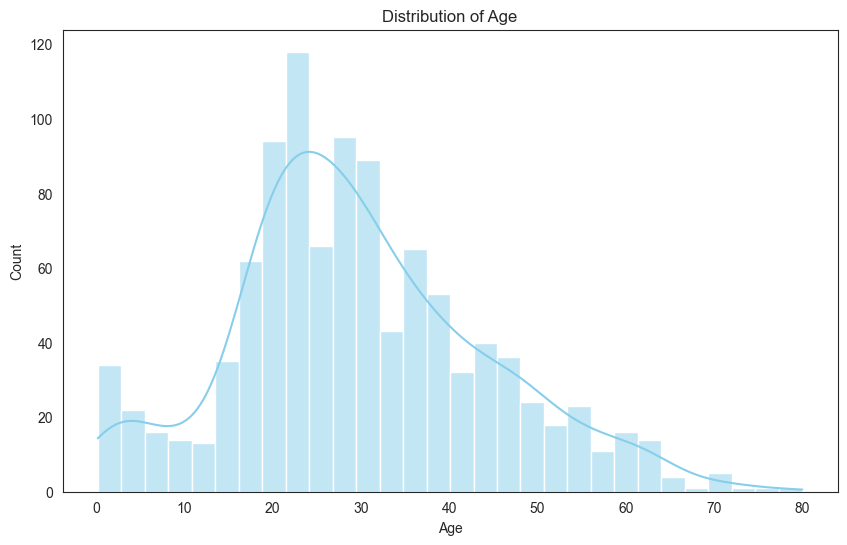

In [144]:

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### `Interpretation` 
We see that the curve of the distribution resembles a normal distribution with a bit of skewness to the left, which shows that the most common ages aboard the titanic were young people aged **20s through 30s**
<br>
We can also note the presence of some outliers at the right-most end of the curve where we have acouple of old people aged around <b>70s and 80s</b> 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24420\3169333035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='embarked', palette='bright')


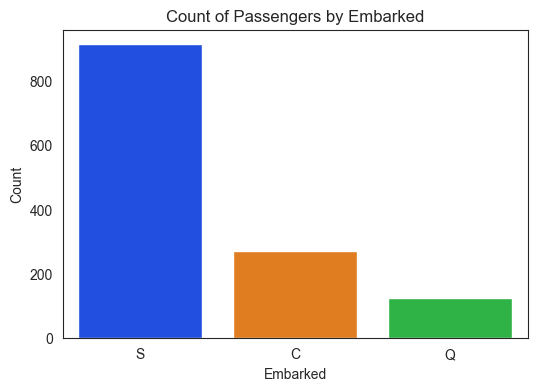

In [145]:

plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='embarked', palette='bright')
plt.title('Count of Passengers by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

#### `Interpretation`
We can see that most of the passengers embarked from the **South Hampton** port

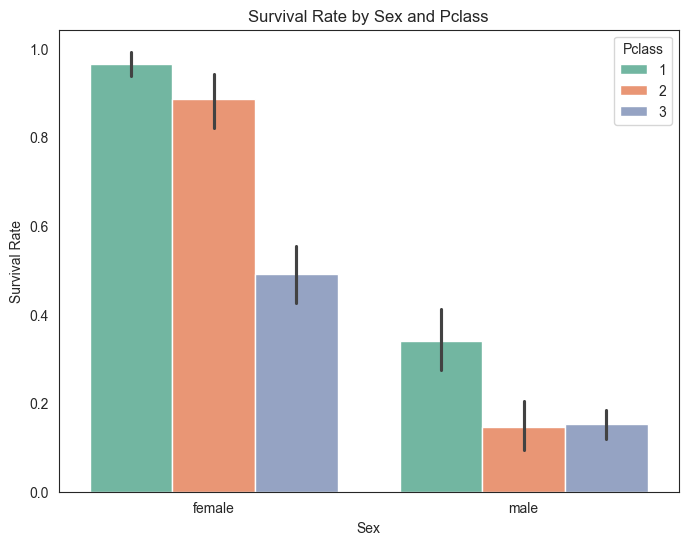

In [146]:
plt.figure(figsize=(8, 6))
sns.barplot(data=dataset, x='sex', y='survived', hue='pclass', palette='Set2')
plt.title('Survival Rate by Sex and Pclass')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.legend(title='Pclass')
plt.show()

#### `Interpretation`
From the following graph we can see that saving women was prioritized over that of the men, and we can clearly see the difference between **class 1 & 2** and **class 3** in terms of survival as we know that those who were in 3rd class were servant and thus considered dispensible

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24420\2484355107.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age = train_data.groupby(age_groups)['survived'].mean()


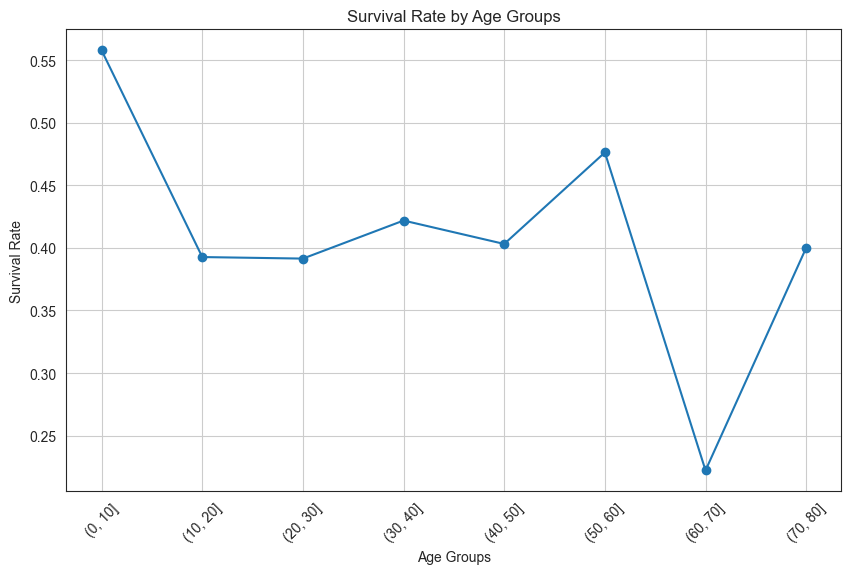

In [147]:
plt.figure(figsize=(10, 6))
age_groups = pd.cut(train_data['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
survival_rate_by_age = train_data.groupby(age_groups)['survived'].mean()
survival_rate_by_age.plot(marker='o')
plt.title('Survival Rate by Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### `Interpretation`
We see that saving children and old people was prioritized over that of young and middle aged people.

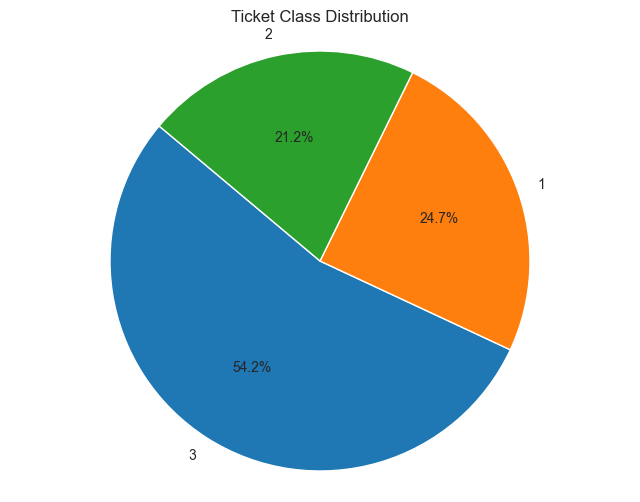

In [148]:
plt.figure(figsize=(8, 6))
ticket_class_counts = train_data['pclass'].value_counts()
plt.pie(ticket_class_counts, labels=ticket_class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ticket Class Distribution')
plt.axis('equal')
plt.show()

### `Interpretation`
We clearly see that the number of 3rd class tickets aboard the titanic is more than half of the 1st and 2nd ones as it was clearly cheaper at the time so more people were able to afford to buy it as opposed to the 1st and 2nd class whose price points targeted a certain audience and certain society standing. 

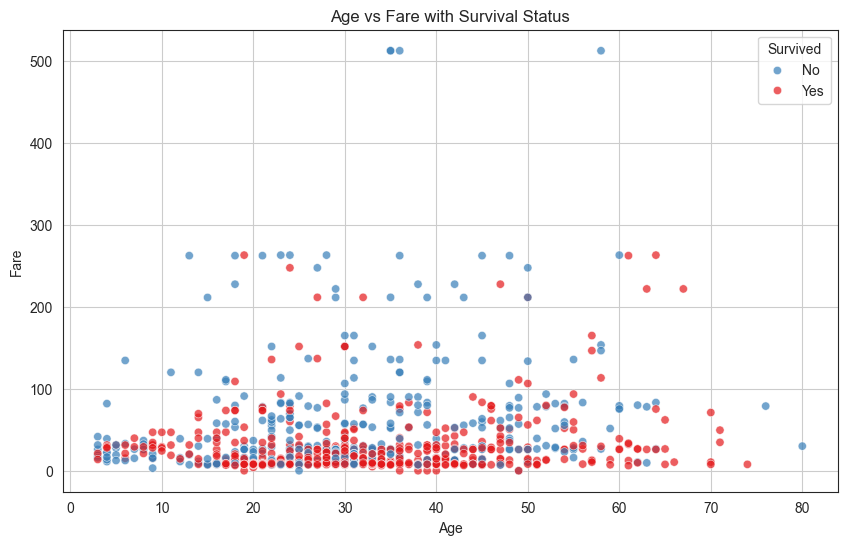

In [149]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='age', y='fare', hue='survived', palette='Set1', alpha=0.7)
plt.title('Age vs Fare with Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

### `Interpretation` 
We see that most of the people we payed for an expensive ticket (>150) did not survive.

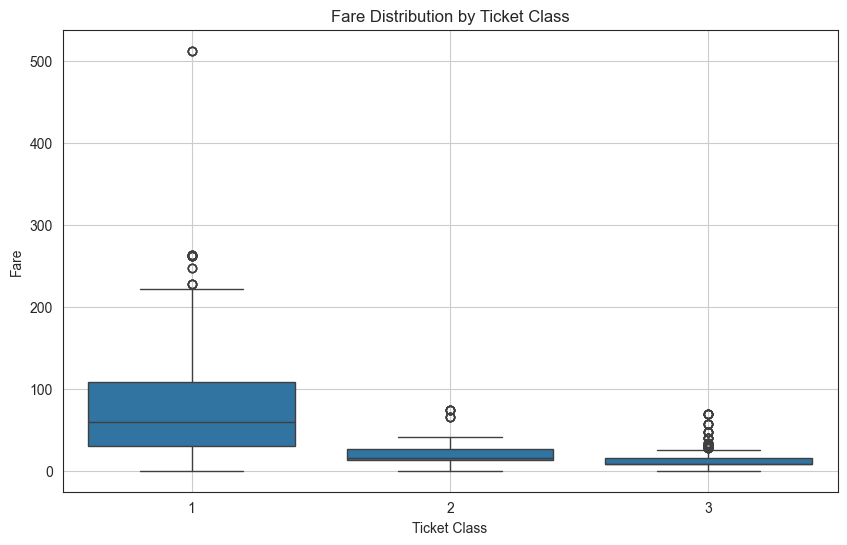

In [150]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='pclass', y='fare')
plt.title('Fare Distribution by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

### `Interpretation` 
This box plot shows the big difference in price points when it comes to different class tickets as well as show us the outliers in the data which are not a lot as shown above.

## Step 3. Machine Learning Models

### KNN Algorithm

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [152]:
x_train_preprocessed = full_pipe_preprocessing.fit_transform(x_train)
x_test_preprocessed = full_pipe_preprocessing.transform(x_test)

In [153]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_preprocessed,y_train)

KNeighborsClassifier(n_neighbors=3)

In [154]:
pred= knn.predict(x_test_preprocessed)
#pred

In [155]:
acc = accuracy_score(y_test,pred)
print("Accuracy:", acc)

Accuracy: 0.7760814249363868


In [156]:
pred_train= knn.predict(x_train_preprocessed)
#pred_train

In [157]:
acc_train= accuracy_score(y_train,pred_train)
print("Accuracy:", acc_train)

Accuracy: 0.8635371179039302


In [158]:
score_train=knn.score(x_train_preprocessed, y_train)
score=knn.score(x_test_preprocessed, y_test)
print("Test set score:", score)
print("Train set score:", score_train)

Test set score: 0.7760814249363868
Train set score: 0.8635371179039302


In [159]:
conf= confusion_matrix(y_test,pred)
print(conf)

[[194  30]
 [ 58 111]]


**Plotting confusion matrix**

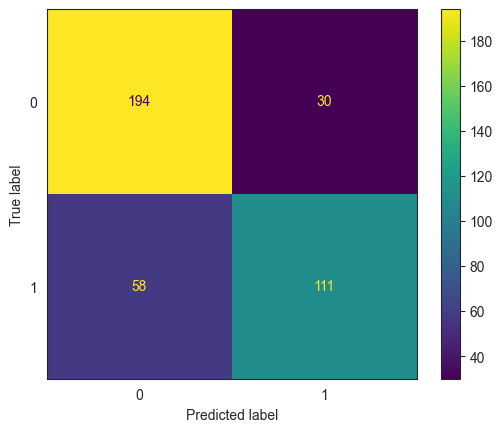

In [160]:
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_style("white")
ConfusionMatrixDisplay(conf).plot()
plt.show()

In [161]:
TN,FP,FN,TP= conf.ravel()
prec= TP/(TP+FP)
rec= TP/(TP+FN)
F1= TP/(TP+(0.5*(FP+FN)))
print('Precision: ',prec)
print('Recall: ',rec)
print('F1-score: ',F1)

Precision:  0.7872340425531915
Recall:  0.6568047337278107
F1-score:  0.7161290322580646


##### Experimenting with different distance metrics

In [162]:
metrics=['euclidean','manhattan','cosine','minkowski']
for m in metrics:
    knn= KNeighborsClassifier(n_neighbors=3,metric=m)
    knn.fit(x_train_preprocessed,y_train)
    pred= knn.predict(x_test_preprocessed)
    acc= accuracy_score(y_test,pred)
    print("Accuracy of",m,'=',acc)

Accuracy of euclidean = 0.7760814249363868
Accuracy of manhattan = 0.7735368956743003
Accuracy of cosine = 0.7684478371501272
Accuracy of minkowski = 0.7760814249363868


##### Selecting the best k value based on performance

In [163]:
from sklearn.metrics import f1_score
#x_val_preprocessed = full_pipe_preprocessing.fit_transform(x_val)
k_values = [3, 5, 7, 9, 11]
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train_preprocessed, y_train)
    pred = knn_model.predict(x_test_preprocessed)
    f1 = f1_score(y_test, pred)
    print("k Value:", k)
    print("F1 Score:", f1)
    print()

k Value: 3
F1 Score: 0.7161290322580646

k Value: 5
F1 Score: 0.7331189710610932

k Value: 7
F1 Score: 0.6976744186046512

k Value: 9
F1 Score: 0.6845637583892618

k Value: 11
F1 Score: 0.6983050847457627



Best k value based on accuracy is 3 

In [164]:
best_k=5

Applying the model to the testing set for predictions

In [165]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(x_train_preprocessed, y_train)
y_pred = knn_model.predict(x_test_preprocessed)
acc= accuracy_score(y_test,y_pred)
print("Accuracy of:",acc)

Accuracy of: 0.7888040712468194


##### Use the final model to make the predictions on the test data

In [166]:
test_data.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34,0,0,7.8292,Q
1,3,female,47,1,0,7.0000,S
2,2,male,62,0,0,9.6875,Q
3,3,male,27,0,0,8.6625,S
4,3,female,22,1,1,12.2875,S


In [167]:
# Apply preprocessing to the test data
test_preprocessed = full_pipe_preprocessing.transform(test_data)
# make the predictions 
knn_predict = knn_model.predict(test_preprocessed)
knn_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [168]:
# add the prediction column to the dataframe 
knn_test_df = pd.concat([test_data, pd.DataFrame({'survived': knn_predict})], axis=1)
knn_test_df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,34,0,0,7.8292,Q,0
1,3,female,47,1,0,7.0000,S,0
2,2,male,62,0,0,9.6875,Q,0
3,3,male,27,0,0,8.6625,S,0
4,3,female,22,1,1,12.2875,S,0


### Naive Bayes

#### Explanation:

**Importing Gaussian Naive Bayes Classifier**

**Training the Classifier:**
- `gaussian_naive_bayes = GaussianNB()`: Initializes a new instance of the GNB classifier.
- `gaussian_naive_bayes.fit(x_train_preprocessed, y_train)`: Trains the GNB classifier using preprocessed training data and corresponding labels.

#### Why Gaussian Naive Bayes:

- **Feature Independence Assumption:** GNB assumes that features are conditionally independent given the class label.
- **Efficiency and Scalability:** Suitable for large datasets and high-dimensional feature spaces.
- **Gaussian Distribution:** Specifically designed for continuous features following a Gaussian distribution.
- **Ease of Interpretation:** Easy to interpret and understand, suitable for transparent models.


In [169]:
from sklearn.naive_bayes import GaussianNB

#Train Gaussian Naive Bayes Classifier
gaussian_naive_bayes = GaussianNB()
gaussian_naive_bayes.fit(x_train_preprocessed, y_train)

GaussianNB()

#### Explanation:

**Model Evaluation:**
- `gaussian_naive_bayes.score(x_test_preprocessed, y_test)`: Calculates the accuracy of the Gaussian Naive Bayes classifier on the preprocessed test data (`x_test_preprocessed`) by comparing the predicted labels to the true labels (`y_test`).

#### Accuracy Score:
- **Accuracy:** Accuracy measures the proportion of correctly predicted instances out of the total instances in the test set.
- **Scoring Method:** The `score()` method of the Gaussian Naive Bayes classifier calculates the accuracy score based on the provided test data and true labels.
- **Interpretation:** A higher accuracy score indicates better performance of the classifier in predicting the correct labels for the test instances.



In [170]:
gaussian_naive_bayes.score(x_test_preprocessed,y_test)

0.7837150127226463

#### Explanation:

**Making Predictions:**
- `gaussian_naive_bayes.predict(x_test_preprocessed)`: Generates predictions for the test data (`x_test_preprocessed`) using the trained Gaussian Naive Bayes classifier.

#### Predicted Labels:
- **Prediction:** The `predict()` method of the Gaussian Naive Bayes classifier assigns predicted labels to the test instances based on their features.
- **Usage:** The resulting `y_pred` array contains the predicted labels for the test instances.

This step allows us to assess the model's performance by comparing the predicted labels to the true labels in the test set.


In [171]:
# Predictions on the test set
y_pred = gaussian_naive_bayes.predict(x_test_preprocessed)
#y_pred

In [172]:
from sklearn.metrics import accuracy_score

# printing accuracy score for the model
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7837


#### Explanation:

**Making Predictions on Training Data:**
- `gaussian_naive_bayes.predict(x_train_preprocessed)`: Generates predictions for the training data (`x_train_preprocessed`) using the trained Gaussian Naive Bayes classifier.

#### Predicted Labels:
- **Prediction:** The `predict()` method of the Gaussian Naive Bayes classifier assigns predicted labels to the training instances based on their features.
- **Usage:** The resulting `y_pred_train` array contains the predicted labels for the training instances.

This step allows us to evaluate the model's performance on the training data by comparing the predicted labels to the true labels used for training.


In [173]:
y_pred_train = gaussian_naive_bayes.predict(x_train_preprocessed)
#y_pred_train

In [174]:
# printing training set accuracy
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7817


In [175]:
accuracy = accuracy_score(y_train, y_pred_train)

#### Explanation:

**Computing Confusion Matrix:**
- `confusion_matrix(y_test, y_pred)`: Computes the confusion matrix for the predicted labels (`y_pred`) compared to the true labels (`y_test`).

#### Confusion Matrix:
- **Definition:** The confusion matrix is a table that summarizes the performance of a classification algorithm by comparing predicted and true labels.
- **Usage:** The `confusion_matrix()` function from scikit-learn calculates the number of true positives, false positives, true negatives, and false negatives.
- **Result:** The `conf_matrix` variable stores the computed confusion matrix as a 2x2 array.

This step provides valuable insights into the model's performance, highlighting the number of correct and incorrect predictions across different classes.


In [176]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [177]:
print(conf_matrix)

[[184  40]
 [ 45 124]]


#### Explanation:

This step visualizes the confusion matrix, providing a clear representation of the model's performance in predicting true and false labels across different classes.


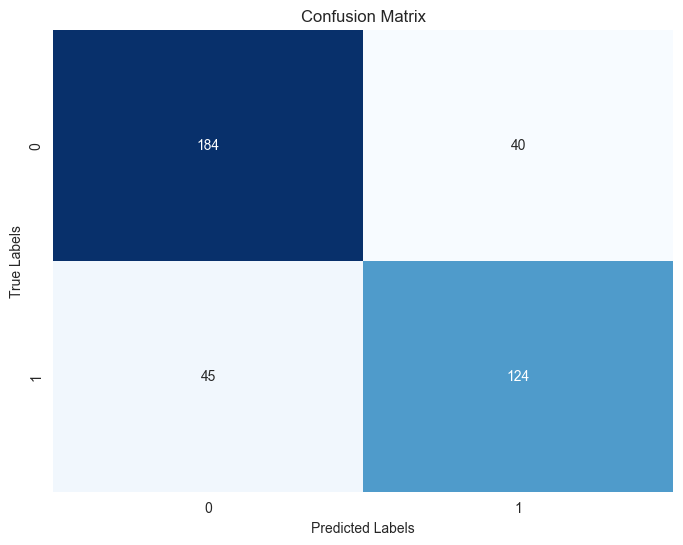

In [178]:
import seaborn as sns

# Draw the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#### Explanation:

**Computing Precision, Recall, and F1-score:**
- `precision = precision_score(y_test, y_pred)`: Computes the precision score, which measures the proportion of true positive predictions among all positive predictions.
- `recall = recall_score(y_test, y_pred)`: Computes the recall score, which measures the proportion of true positive predictions among all actual positives.
- `f1 = f1_score(y_test, y_pred)`: Computes the F1-score, which is the harmonic mean of precision and recall. It provides a balance between precision and recall.

**Evaluation Metrics:**
- **Precision:** High precision indicates low false positive rate, i.e., the model makes few incorrect positive predictions.
- **Recall:** High recall indicates low false negative rate, i.e., the model captures most of the actual positives.
- **F1-score:** High F1-score indicates a balance between precision and recall, making it a useful metric for binary classification tasks with imbalanced classes.


These evaluation metrics provide insights into the classifier's performance, helping to assess its ability to correctly classify instances across different classes.


In [179]:
# compute precision , recall , and F1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('F1-score: ',f1)

Precision:  0.7560975609756098
Recall:  0.7337278106508875
F1-score:  0.7447447447447447


In [180]:
# Check the columns selected for preprocessing in the training data
print("Columns selected for preprocessing in the training data:")
print(x_train.columns.tolist())

# Check the columns selected for preprocessing in the test data
print("\nColumns selected for preprocessing in the test data:")
print(test_data.columns.tolist())

Columns selected for preprocessing in the training data:
['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

Columns selected for preprocessing in the test data:
['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']


In [181]:
# Apply preprocessing to the test data
test_preprocessed = full_pipe_preprocessing.transform(test_data)

#### Explanation:

**Predictions on Unlabeled Test Data:**
- `test_predictions = gaussian_naive_bayes.predict(test_preprocessed)`: Generates predictions for the unlabeled test data (`test_preprocessed`) using the trained Gaussian Naive Bayes classifier.

**Usage:**
- **Prediction:** The `predict()` method of the Gaussian Naive Bayes classifier assigns predicted labels to the unlabeled test instances based on their features.
- **Output:** The resulting `test_predictions` array contains the predicted labels for the unlabeled test instances.

This step applies the trained model to make predictions on new, unseen data, allowing us to assess the classifier's performance in a real-world scenario where true labels are unavailable.


In [182]:
# Predictions on the unlabelled test data
test_predictions = gaussian_naive_bayes.predict(test_preprocessed)

#### Explanation:

**Assigning Predicted Labels to Test Data:**
- `test_data['survived'] = test_predictions`: Assigns the predicted labels (`test_predictions`) to a new column named 'survived' in the test data DataFrame (`test_data`).

**Usage:**
- **DataFrame Manipulation:** The assignment operation adds a new column to the test data DataFrame, containing the predicted labels generated by the Gaussian Naive Bayes classifier.
- **Integration with Test Data:** By adding predicted labels to the test data, we can compare them with the ground truth (if available) or use them for further analysis and evaluation.

This step integrates the predicted labels into the test data for easy comparison and analysis of the model's performance on unseen instances.


In [183]:
# add the prediction column to the dataframe 
nb_test_df = pd.concat([test_data, pd.DataFrame({'survived':test_predictions})], axis=1)
nb_test_df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,34,0,0,7.8292,Q,0
1,3,female,47,1,0,7.0000,S,1
2,2,male,62,0,0,9.6875,Q,0
3,3,male,27,0,0,8.6625,S,0
4,3,female,22,1,1,12.2875,S,1


### Support Vector machine 
#### Kernel functions
In this section we will experiment with different `kernel` functins while keeping the rest of the parameters at their default values. <br>
Kernel functions that we will use are:
- RBF 
- Linear
- Polynomial

**<u>Radial basis function (rbf)</u>**

In [184]:
from sklearn.svm import SVC

# Create a pipeline for the whole process
svm_pipe_rbf = Pipeline([
    ('preprocessing', full_pipe_preprocessing),  # preprocessing pipeline
    ('model', SVC(kernel='rbf', gamma='scale'))  # the SVM model
])

Train the model using the data and evaluate accuracy

In [185]:
# train the model
svm_pipe_rbf.fit(x_train, y_train)
# calculate accuracy
accuracy_rbf=svm_pipe_rbf.score(x_test, y_test)
accuracy_rbf

0.7888040712468194

**<u>Linear function</u>**

In [186]:
from sklearn.svm import SVC

# Create a pipeline for the whole process
svm_pipe_linear = Pipeline([
    ('preprocessing', full_pipe_preprocessing),  # preprocessing pipeline
    ('model', SVC(kernel='linear', gamma='scale'))  # the SVM model
])

Train the model using the data and evaluate the accuacy

In [187]:
# train the model
svm_pipe_linear.fit(x_train, y_train)
# calculate accuracy
accuracy_linear=svm_pipe_linear.score(x_test, y_test)
accuracy_linear

0.7888040712468194

**<u>Polynomial function</u>**

In [188]:
from sklearn.svm import SVC

# Create a pipeline for the whole process
svm_pipe_poly = Pipeline([
    ('preprocessing', full_pipe_preprocessing),  # preprocessing pipeline
    ('model', SVC(kernel='poly', degree=3, gamma='scale'))  # the SVM model
])

Train the model using the data and evaluate the accuacy

In [189]:
# fit the model to the data
svm_pipe_poly.fit(x_train, y_train)
# calculate accuracy
accuracy_poly = svm_pipe_poly.score(x_test, y_test)
accuracy_poly

0.7709923664122137

Comparing between the accuracies of the baseline model using the three kernel functions

In [190]:
kernel_compare = pd.DataFrame({'RBF': accuracy_rbf, 'Linear': accuracy_linear, 'Polynomial': accuracy_poly}, index=['accuracy'])
kernel_compare.head()

,RBF,Linear,Polynomial
accuracy,0.788804,0.788804,0.770992


#### Regularization parameters
In this section we will expirement with different regularization paramters by giving different values to the parameters `C` and `gamma`
##### First: Changing `gamma`
we may compare between 3 values: 
- the default: `scale`
- `auto`
- `0.1`

In [191]:
# using the all the default values + gamma = scale
svm_gamma1 = Pipeline([
    ('preprocessing', full_pipe_preprocessing),
    ('model', SVC(gamma='scale'))
])
# fit the model 
svm_gamma1.fit(x_train, y_train)

# evaluate the accuracy
acc_gamma1 = svm_gamma1.score(x_test, y_test)
acc_gamma1

0.7888040712468194

In [192]:
# using the all the default values + gamma = auto
svm_gamma2 = Pipeline([
    ('preprocessing', full_pipe_preprocessing),
    ('model', SVC(gamma='auto'))
])
# fit the model 
svm_gamma2.fit(x_train, y_train)

# evaluate the accuracy
acc_gamma2 = svm_gamma2.score(x_test, y_test)
acc_gamma2

0.7989821882951654

In [193]:
# using the all the default values + gamma = 0.1
svm_gamma3 = Pipeline([
    ('preprocessing', full_pipe_preprocessing),
    ('model', SVC(gamma=0.1))
])
# fit the model 
svm_gamma3.fit(x_train, y_train)

# evaluate the accuracy
acc_gamma3 = svm_gamma3.score(x_test, y_test)
acc_gamma3

0.7989821882951654

A table to compare the accuracy of all 3 gamma values

In [194]:
gamma_table = pd.DataFrame({
    'scale': acc_gamma1,
    'auto': acc_gamma2,
    'gamma = 0.1': acc_gamma3
}, index=['accuracy'])
gamma_table.head()

,scale,auto,gamma = 0.1
accuracy,0.788804,0.798982,0.798982


##### First: Changing `C`
we may compare between 3 values: 
- the default: `1`
- `3`
- `0.5`

In [195]:
# using the all the default values + C=1
svm_c1 = Pipeline([
    ('preprocessing', full_pipe_preprocessing),
    ('model', SVC(C=1))
])
# fit the model 
svm_c1.fit(x_train, y_train)

# evaluate the accuracy
acc_c1 = svm_c1.score(x_test, y_test)
acc_c1

0.7888040712468194

In [196]:
# using the all the default values + C=3
svm_c2 = Pipeline([
    ('preprocessing', full_pipe_preprocessing),
    ('model', SVC(C=3))
])
# fit the model 
svm_c2.fit(x_train, y_train)

# evaluate the accuracy
acc_c2 = svm_c2.score(x_test, y_test)
acc_c2

0.7938931297709924

In [197]:
# using the all the default values + C=0.5
svm_c3 = Pipeline([
    ('preprocessing', full_pipe_preprocessing),
    ('model', SVC(C=0.5))
])
# fit the model 
svm_c3.fit(x_train, y_train)

# evaluate the accuracy
acc_c3 = svm_c3.score(x_test, y_test)
acc_c3

0.7913486005089059

A table to compare all 3 of C values

In [198]:
c_table = pd.DataFrame({'c=1': acc_c1, 'c=3': acc_c2, 'c=0.5': acc_c3}, index=['accuracy'])
c_table.head()

,c=1,c=3,c=0.5
accuracy,0.788804,0.793893,0.791349


Trying a combination of these two parameters:
- `C = 0.5`
- `gamma = 0.1` <br>
and evaluating the perfomance

In [199]:
svm_combination = Pipeline([
    ('preprocessing', full_pipe_preprocessing),
    ('model', SVC(C=0.5, gamma=0.1))
])
# fit the model 
svm_combination.fit(x_train, y_train)

# evaluate the accuracy
acc_combination = svm_combination.score(x_test, y_test)
acc_combination

0.8040712468193384

#### Fine tuning hyperparameters
we have 3 hyperparameters to fine tune:
* `kernel` function that transforms the the dataset into a higher training dimension to make it linearly separable 
* `c` the l2 regularization parameter (penalty for missclassification), which is inversely proportional to the strength of the regularization.
* `gamma` the kernel coefficient for the kernel functions `rbf`, `poly` and `sigmoid`

#### RandomSearch for hyperparameter tuning
we will compare between 4 values of `c`, 5
 values of `gamma` including the *scale* and *auto* values included in sklearn and the three kernel functions.<br> 
`scoring = ['accuracy']` is the metric used to evaluate the model

In [200]:
# list of c values 
c_range = [0.1, 0.5, 1, 3]
print(f'list of values of c {c_range}')

# list of gamma values 
gamma_range = [1,0.1,0.01]
print(f"list of gamma values {gamma_range}")

list of values of c [0.1, 0.5, 1, 3]
list of gamma values [1, 0.1, 0.01]


Define a baseline model to use in the fine tuning

In [201]:
baseline_pipe = Pipeline([
    ('preprocessing', full_pipe_preprocessing),  # preprocessing pipeline
    ('model', SVC())  # baseline model using default values
])
baseline_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('categorical pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'embarked'])])),
                ('model', SVC())])

In [202]:
from sklearn.model_selection import StratifiedKFold
# define the search space of the grid search 
search_space = {
    # c parameter
    'model__C': c_range,
    # kernel type
    'model__kernel': ['rbf', 'poly', 'linear'],
    # gamma parameter 
    'model__gamma': gamma_range+['auto', 'scale']
}

# scoring parameter (for evaluation)
scoring = ['accuracy']

# k-fold cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 10)

Define the `RandomizedSearch`

In [203]:
from sklearn.model_selection import RandomizedSearchCV

# define the random search 
random_search = RandomizedSearchCV(estimator = baseline_pipe,  # the model to evaluate 
                           param_distributions=search_space, # the search space of the hyperparams
                           scoring= scoring,  # list of metrics used (in this case accuracy)
                           refit='accuracy',
                           n_iter=15,  # number of iterations 
                           cv= kfold,  # cross validation
                           verbose=4 
                           )

# fit the grid search 
random_result = random_search.fit(x_train, y_train)
# print summary
random_result

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END model__C=3, model__gamma=0.01, model__kernel=linear; accuracy: (test=0.766) total time=   0.0s
[CV 2/5] END model__C=3, model__gamma=0.01, model__kernel=linear; accuracy: (test=0.814) total time=   0.0s
[CV 3/5] END model__C=3, model__gamma=0.01, model__kernel=linear; accuracy: (test=0.732) total time=   0.0s
[CV 4/5] END model__C=3, model__gamma=0.01, model__kernel=linear; accuracy: (test=0.776) total time=   0.0s
[CV 5/5] END model__C=3, model__gamma=0.01, model__kernel=linear; accuracy: (test=0.792) total time=   0.0s
[CV 1/5] END model__C=3, model__gamma=scale, model__kernel=poly; accuracy: (test=0.799) total time=   0.0s
[CV 2/5] END model__C=3, model__gamma=scale, model__kernel=poly; accuracy: (test=0.809) total time=   0.0s
[CV 3/5] END model__C=3, model__gamma=scale, model__kernel=poly; accuracy: (test=0.765) total time=   0.0s
[CV 4/5] END model__C=3, model__gamma=scale, model__kernel=poly; accuracy: (te

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('numeric '
                                                                               'pipe',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['pclass',
                                                                                'age',
                                                                                'sibsp',
                                                                                'parch',
                                                                                'fare']),
                                                                              ('categorical '
                                                                               'pipe',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['sex',
                                                                                'embarked'])])),
                                             ('model', SVC())]),
                   n_iter=15,
                   param_distributions={'model__C': [0.1, 0.5, 1, 3],
                                        'model__gamma': [1, 0.1, 0.01, 'auto',
                                                         'scale'],
                                        'model__kernel': ['rbf', 'poly',
                                                          'linear']},
                   refit='accuracy', scoring=['accuracy'], verbose=4)

In [204]:
# best accuracy score for the training dataset
print(f"best accuracy is {random_result.best_score_}")

# hyperparameters that got us the highest accuracy
print(f"best hyperparameters are {random_result.best_params_}")

best accuracy is 0.8078759800427655
best hyperparameters are {'model__kernel': 'rbf', 'model__gamma': 0.1, 'model__C': 3}


##### Using the fine tuned parameters on the model 

In [205]:
svm_fine_tuned = Pipeline([
    ('preprocssing', full_pipe_preprocessing), 
    ('model', SVC(gamma='auto', C=3, kernel='rbf'))
])

# Fit the model to the train data
svm_fine_tuned.fit(x_train, y_train)

Pipeline(steps=[('preprocssing',
                 ColumnTransformer(transformers=[('numeric pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('categorical pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'embarked'])])),
                ('model', SVC(C=3, gamma='auto'))])

In [206]:
# evaluate the model and calculate the accuracy 
fine_tuned_accuracy = svm_fine_tuned.score(x_test, y_test)
fine_tuned_accuracy

0.7938931297709924

#### Evaluating the fine tuned model on the test set 

In [207]:
# make the predictions 
final_predict = svm_fine_tuned.predict(x_test)

In [208]:
from sklearn.metrics import accuracy_score, classification_report

# calculate the test accuracy of the model 
final_accuracy = accuracy_score(y_test, final_predict)
# print the calculated accuracy
print('Test accuracy: ', final_accuracy*100, '%')

Test accuracy:  79.38931297709924 %


***Calculate metrics and plot confusion matrix***

Calculate the metrics

In [209]:
from sklearn.metrics import classification_report 

print('\t\t\tclassification report:\n\n',classification_report(y_test, final_predict))

			classification report:

               precision    recall  f1-score   support

           0       0.76      0.94      0.84       224
           1       0.88      0.60      0.72       169

    accuracy                           0.79       393
   macro avg       0.82      0.77      0.78       393
weighted avg       0.81      0.79      0.79       393



In [210]:
f1_final_svm = f1_score(y_test, final_predict)
acc_final_svm = accuracy_score(y_test, final_predict) 
recall_final_svm= recall_score(y_test, final_predict) 
precision_final_svm= precision_score(y_test,final_predict)

Plotting the confusion matrix

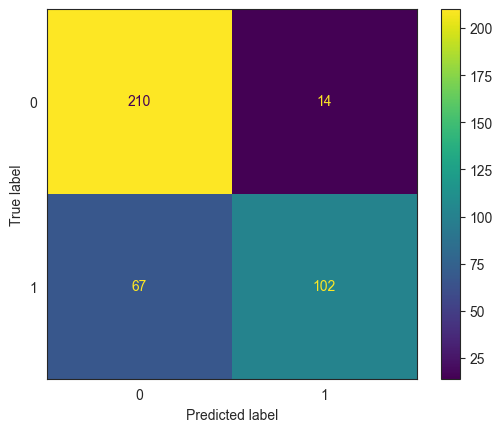

In [211]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
sns.set_style("white")

# create confusion matrix
cm = confusion_matrix(y_test, final_predict)

# display confusion matrix
ConfusionMatrixDisplay(confusion_matrix = cm).plot()
plt.show()

##### Using the final model to make predictions on the `test_data`

In [212]:
# take a look at the test data
test_data.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34,0,0,7.8292,Q
1,3,female,47,1,0,7.0000,S
2,2,male,62,0,0,9.6875,Q
3,3,male,27,0,0,8.6625,S
4,3,female,22,1,1,12.2875,S


In [213]:
# use the model to make predictions
svm_final_predict = svm_fine_tuned.predict(test_data)
svm_final_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [214]:
# add the prediction column to the dataframe 
svm_test_df = pd.concat([test_data, pd.DataFrame({'survived':svm_final_predict})], axis=1)
svm_test_df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,34,0,0,7.8292,Q,0
1,3,female,47,1,0,7.0000,S,0
2,2,male,62,0,0,9.6875,Q,0
3,3,male,27,0,0,8.6625,S,0
4,3,female,22,1,1,12.2875,S,0


#### Tubular comparison between all the svm models tried
Constructing a table to compare between the highest performer in each gp of models to see which model provided us with the highest accuracy

In [215]:
accuracy_table = pd.DataFrame({
    'Highest kernel (rbf)': accuracy_rbf,
    'Highest Gamma (auto)': acc_gamma2,
    'Highest C (3):': acc_c2,
    'C=0.5, gamma = 0.1': acc_combination, 
    'final model': final_accuracy
}, index=['accuracy'])
accuracy_table.head()

,Highest kernel (rbf),Highest Gamma (auto),Highest C (3):,"C=0.5, gamma = 0.1",final model
accuracy,0.788804,0.798982,0.793893,0.804071,0.793893


##### `Conclusion` <br>
We find that the fine tuned model doesn't deliver the highest accuracy score because the randomized search goes through only a subset of the possibilities and returns the best one. <br>
And as we can see the highest model accuracy `80.4%` can be achieved using the following hyperparameters:
- kernel = `rbf`
- gamma = `0.1`
- C = `0.5`

<hr>

## Step 3.1 Neural Network
**<u>Network Structure</u>**
- Input layer: 7 nodes for the seven features
- 3 Hidden layers: all using `ReLU` activation function
    * 3 nodes
    * 2 nodes
    * 3 nodes
- Output layer: 1 node with `Sigmoid` activtion function <br><br>

Apply the preprocessing pipeline on the data

In [216]:
x_train_prep = full_pipe_preprocessing.fit_transform(x_train)
x_test_prep = full_pipe_preprocessing.fit_transform(x_test)

***Creating the model***

In [217]:
from keras.models import Sequential
from keras.layers import Dense
import keras
import tensorflow as tf

def neural_network():
    # intantiate the sequential model 
    model = Sequential()

    # add layers
    # 1st hidden layer: features inputs, 3 outputs, ReLU 
    model.add(Dense(3, activation='relu', input_shape=(x_train_prep.shape[1],)))
    # 2nd hidden layer: 3 inputs, 2 outputs, ReLU
    model.add(Dense(2, activation='relu'))
    # 3rd hidden layer: 2 inputs, 3 outputs, ReLU
    model.add(Dense(3, activation='relu'))
    # output layer 
    model.add(Dense(1, activation='sigmoid'))

    # compile the model (with Adam optimizer & define loss function)
    model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

***Train and evaluate the model***

In [218]:
# create the model by calling the function
model = neural_network()

# fit the model
history = model.fit(x_train_prep, y_train, epochs = 100)

Epoch 1/100


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3969 - loss: 0.7818
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5133 - loss: 0.6925
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5874 - loss: 0.6741
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6596 - loss: 0.6664
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6891 - loss: 0.6607
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6991 - loss: 0.6423
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7311 - loss: 0.6465
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7345 - loss: 0.6319
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7524 - loss: 0.6252
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7465 - loss: 0.6210
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7375 - loss: 0.6154
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7572 - lo

In [219]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 3)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164 (660.00 B)

 Trainable params: 54 (216.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 110 (444.00 B)

***Plotting a the curve of the training accurracy and a the curve of the training loss***

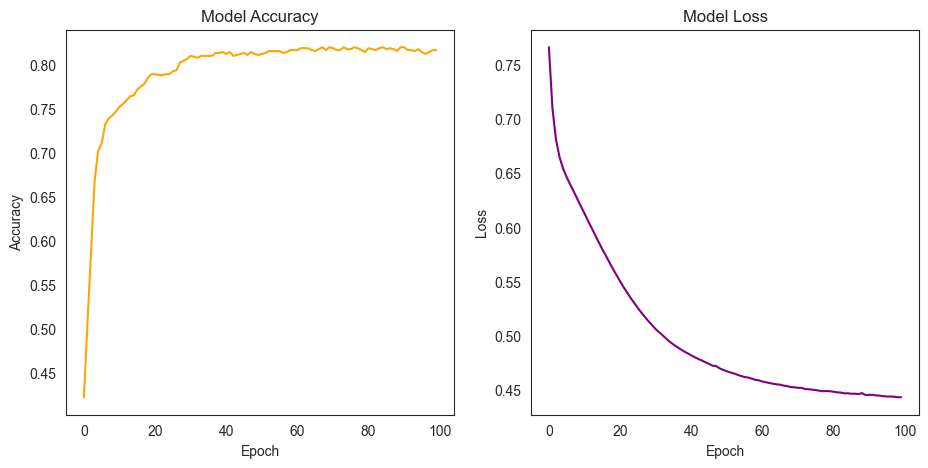

In [220]:
plt.figure(figsize=(11,5))

# plot accuracy curve
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color = 'orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# plot loss curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'], color = 'purple')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

#### Evaluate the model
By making predctions and calculating a few metrics like:
- accuracy
- precision
- recall

In [221]:
scores = model.evaluate(x_test_prep, y_test)
print('model accuracy = ', scores[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7657 - loss: 0.5128  
model accuracy =  0.783715009689331


***Make predictions and produce confusion matrix***

In [222]:
predictions = model.predict(x_test_prep)
#predictions

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [223]:
# set a threshold for the probabilities produced by the sigmoid fun. (>=0.5 and <0.5)
predictions = [1 if pred>0.5 else 0 for pred in predictions]
#predictions

Calculate the metrics

In [224]:
from sklearn.metrics import classification_report 

print('\t\t\tclassification report:\n\n',classification_report(y_test, predictions))

			classification report:

               precision    recall  f1-score   support

           0       0.74      0.95      0.83       224
           1       0.89      0.57      0.69       169

    accuracy                           0.78       393
   macro avg       0.82      0.76      0.76       393
weighted avg       0.81      0.78      0.77       393



Plotting the confusion matrix

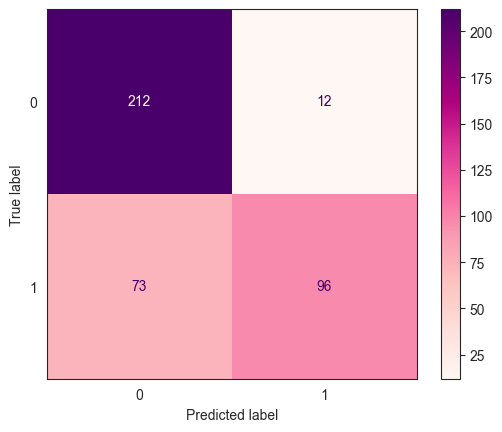

In [225]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# create confusion matrix
cm = confusion_matrix(y_test, predictions)

# display confusion matrix
ConfusionMatrixDisplay(confusion_matrix = cm).plot(cmap='RdPu')
plt.show()

##### Using the final model to make predictions on the `test_data`

In [226]:
# take a look at the test data
test_data.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34,0,0,7.8292,Q
1,3,female,47,1,0,7.0000,S
2,2,male,62,0,0,9.6875,Q
3,3,male,27,0,0,8.6625,S
4,3,female,22,1,1,12.2875,S


In [227]:
# use the model to make predictions
ann_predict = model.predict(test_preprocessed)
#ann_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [228]:
# set a threshold for the probabilities produced by the sigmoid fun. (>=0.5 and <0.5)
ann_predict = [1 if pred>0.5 else 0 for pred in ann_predict]
ann_predict

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]

In [229]:
# add the prediction column to the dataframe 
ann_test_df = pd.concat([test_data, pd.DataFrame({'survived':ann_predict})], axis=1)
ann_test_df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,34,0,0,7.8292,Q,0
1,3,female,47,1,0,7.0000,S,0
2,2,male,62,0,0,9.6875,Q,0
3,3,male,27,0,0,8.6625,S,0
4,3,female,22,1,1,12.2875,S,0


## Step 4. Comparative Analysis

In [230]:
# Create a dictionary with the performance metrics of each model
model_metrics = {
    "Accuracy": [acc,accuracy,final_accuracy],
    "Precision": [prec, precision,precision_final_svm],
    "Recall": [rec, recall,recall_final_svm],
    "F1-Score": [F1, f1,f1_final_svm]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(model_metrics,index=["KNN", "Naive Bayes","SVM"])

# Print the DataFrame
df.head()

,Accuracy,Precision,Recall,F1-Score
KNN,0.788804,0.787234,0.656805,0.716129
Naive Bayes,0.781659,0.756098,0.733728,0.744745
SVM,0.793893,0.879310,0.603550,0.715789


### Performance Comparison:

- **Accuracy:** SVM achieved the highest accuracy (79.39%), followed closely by Naive Bayes (78.17%) and then KNN (77.61%).
- **Precision:** SVM had the highest precision (87.93%), followed by KNN (78.72%) and then Naive Bayes (75.61%).
- **Recall:** Naive Bayes achieved the highest recall (73.37%), followed by KNN (65.68%) and then SVM (60.36%).
- **F1-Score:** Naive Bayes had the highest F1-Score (74.47%), followed by KNN (71.61%) and then SVM (71.58%).

Overall, Naive Bayes performs well across most metrics, especially in recall and F1-Score. SVM has the highest precision, but it has lower recall compared to Naive Bayes. KNN performs reasonably well but falls behind in precision and recall compared to the other two models.
### Strengths and Weaknesses:

#### KNN:
- **Strengths:**
  - Simple and easy to understand.
  - No assumptions about the underlying data distribution.
  - Can handle non-linear data.
- **Weaknesses:**
  - Computationally expensive during testing, especially with large datasets.
  - Sensitive to irrelevant or redundant features.
  - Performance heavily depends on the choice of k value.

#### Naive Bayes:
- **Strengths:**
  - Fast and efficient, especially for text classification tasks.
  - Works well with high-dimensional data.
  - Handles missing values gracefully.
- **Weaknesses:**
  - Assumes independence between features, which may not hold true in real-world datasets.
  - Sensitivity to outliers.
  - Can be affected by the presence of correlated features.

#### SVM:
- **Strengths:**
  - Effective in high-dimensional spaces, especially when the number of features is greater than the number of samples.
  - Versatile as it can use different kernel functions to handle non-linear decision boundaries.
  - Robust against overfitting, especially in high-dimensional spaces.
- **Weaknesses:**
  - Computationally expensive, especially with large datasets.
  - Requires careful selection of hyperparameters and choice of kernel.
  - Doesn't directly provide probability estimates, requiring additional computation for probability estimates.

### Prediction of Survival Status:

Based on the evaluation metrics and considering the strengths and weaknesses of each algorithm, Naive Bayes appears to be the better-performing algorithm for predicting the survival status of passengers in the Titanic dataset. It achieves competitive accuracy, precision, recall, and F1-Score while being computationally efficient and robust against overfitting. However, it's essential to consider the specific requirements of the task and the dataset characteristics when selecting the most suitable algorithm for prediction.
